In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
stock_data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
stock_data

C:\Users\jbasn\AppData\Local\Temp\ipykernel_15260\2080489352.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600
2023-01-05,123.161942,125.871071,122.905811,125.240583,80962700
2023-01-06,127.693573,128.353614,123.033875,124.137232,87754700
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800
...,...,...,...,...,...
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300


In [6]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600
2023-01-05,123.161942,125.871071,122.905811,125.240583,80962700
2023-01-06,127.693573,128.353614,123.033875,124.137232,87754700
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800


In [7]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700
2023-12-28,191.768967,192.838865,191.362799,192.323725,34049900
2023-12-29,190.728790,192.581291,189.936272,192.085968,42672100


In [8]:
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,170.510816,171.803592,168.962666,170.222272,5.922355e+07
std,17.340362,17.272209,17.538700,17.536309,1.778332e+07
min,123.161942,125.871071,122.324586,124.137232,2.404830e+07
25%,159.947021,160.218352,158.553390,159.396989,4.781208e+07
50%,173.604622,175.138104,171.987024,173.377053,5.511085e+07
75%,185.426701,186.059876,182.954166,184.564625,6.574292e+07
max,196.256577,197.752444,195.156944,196.167422,1.543573e+08


In [9]:
stock_data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [10]:
stock_data.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [11]:
stock_data = stock_data.dropna()

In [12]:
if isinstance(stock_data.columns,pd.MultiIndex):
    stock_data.columns = [col[0] for col in stock_data.columns]

stock_data.columns    

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [13]:
stock_data['Open']

Date
2023-01-03    128.343780
2023-01-04    125.004162
2023-01-05    125.240583
2023-01-06    124.137232
2023-01-09    128.530950
                 ...    
2023-12-22    193.353962
2023-12-26    191.798670
2023-12-27    190.689143
2023-12-28    192.323725
2023-12-29    192.085968
Name: Open, Length: 250, dtype: float64

In [14]:
stock_data['Close']

Date
2023-01-03    123.211212
2023-01-04    124.482040
2023-01-05    123.161942
2023-01-06    127.693573
2023-01-09    128.215698
                 ...    
2023-12-22    191.788757
2023-12-26    191.243912
2023-12-27    191.342957
2023-12-28    191.768967
2023-12-29    190.728790
Name: Close, Length: 250, dtype: float64

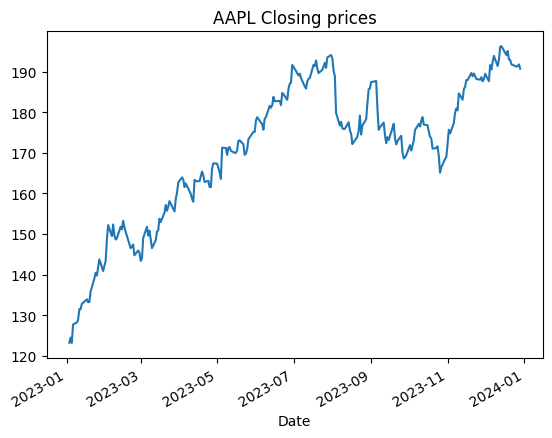

In [15]:
stock_data['Close'].plot(title='AAPL Closing prices')
plt.show()

In [16]:
prices = stock_data['Close']
stock_data["Daily_Return"] = prices.pct_change()
daily_return

NameError: name 'daily_return' is not defined

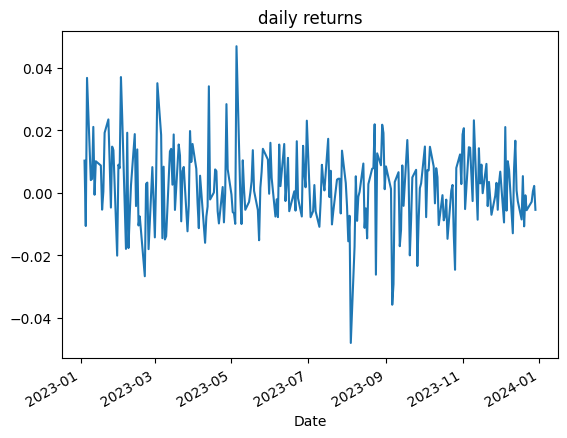

In [17]:
stock_data['Daily_Return'].plot(title='daily returns')
plt.show()

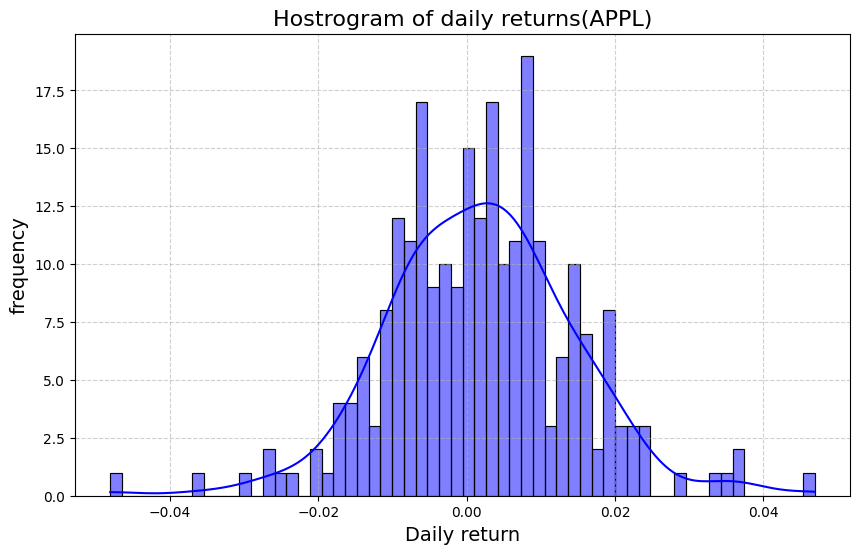

In [18]:
plt.figure(figsize=(10,6))

sns.histplot(stock_data['Daily_Return'],bins=60,kde=True,color='blue')
plt.title('Hostrogram of daily returns(APPL)',fontsize = 16)
plt.ylabel('frequency',fontsize=14)
plt.xlabel('Daily return',fontsize=14)
plt.grid(True,linestyle="--",alpha=0.6)

plt.show()

In [19]:
stock_data['daily_return'] = stock_data['Close'].pct_change()

In [20]:
daily_returns = stock_data['daily_return'].dropna() 

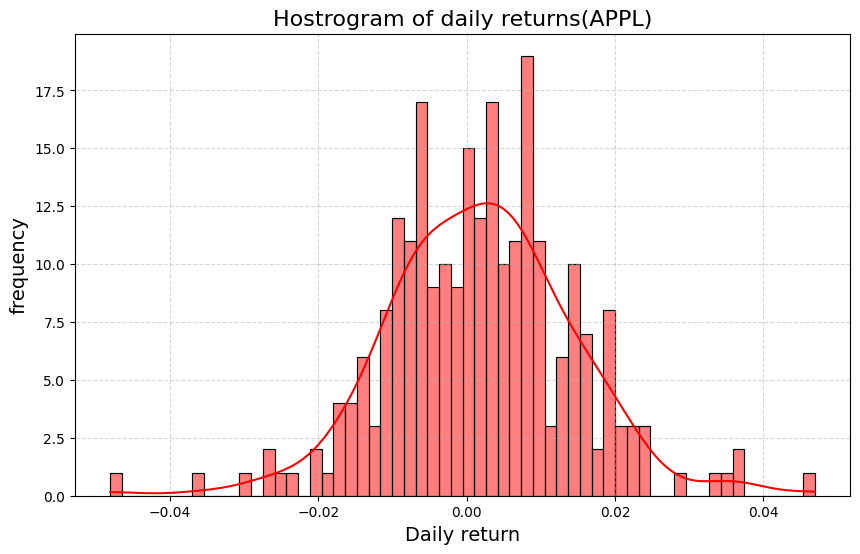

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(data=daily_returns,bins=60,kde=True,color='Red')
plt.title('Hostrogram of daily returns(APPL)',fontsize = 16)
plt.ylabel('frequency',fontsize=14)
plt.xlabel('Daily return',fontsize=14)
plt.grid(True,linestyle="--",alpha=0.5)

plt.show()

In [22]:
daily_volatility = daily_returns.std()
daily_volatility

np.float64(0.012570037348659482)

In [23]:
# calculateing daily volatility

annual_volatility = daily_volatility*np.sqrt(252)


In [24]:
print("Daily volatiltiy",daily_volatility)
print("Annual Volatility",annual_volatility)

Daily volatiltiy 0.012570037348659482
Annual Volatility 0.19954315677208018


In [25]:
stock_data = stock_data.drop("Daily_Return",axis=1)

In [26]:
stock_data['Cumulative Returns'] = (1+ stock_data['daily_return']).cumprod()

In [27]:
stock_data

,Close,High,Low,Open,Volume,daily_return,Cumulative Returns
Date,,,,,,,
2023-01-03,123.211212,128.954561,122.324586,128.343780,112117500,NaN,NaN
2023-01-04,124.482040,126.747861,123.221065,125.004162,89113600,0.010314,1.010314
2023-01-05,123.161942,125.871071,122.905811,125.240583,80962700,-0.010605,0.999600
2023-01-06,127.693573,128.353614,123.033875,124.137232,87754700,0.036794,1.036379
2023-01-09,128.215698,131.427258,127.959568,128.530950,70790800,0.004089,1.040617
...,...,...,...,...,...,...,...
2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600,-0.005547,1.556585
2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300,-0.002841,1.552163
2023-12-27,191.342957,191.689688,189.302232,190.689143,48087700,0.000518,1.552967


<Axes: title={'center': '20- day rolling volatility'}, xlabel='Date'>

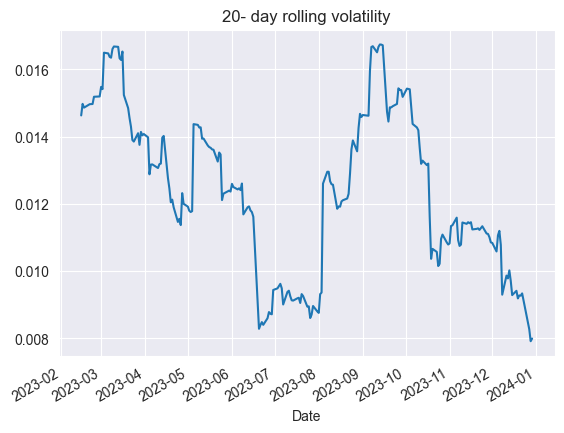

In [28]:
rolling_volatility =  daily_returns.rolling(window=30).std()
rolling_volatility.plot(title='20- day rolling volatility')

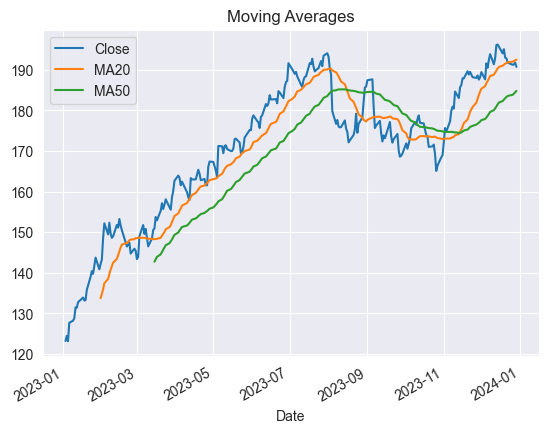

In [29]:
stock_data['MA20']= stock_data['Close'].rolling(window=20).mean()
stock_data['MA50']= stock_data['Close'].rolling(window=50).mean()

stock_data[['Close','MA20','MA50']].plot(title='Moving Averages')
plt.show()